$$
x[n] = A\sin([2 \pi \cdot f n ] + \phi)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io.wavfile import write as
import scipy

In [2]:
# Signal Params contains the parameters for each of the 3 signals [(amplitude, frequencies), ...]
signal_params = [(0.5, 1000), (0.25, 2000), (0.25, 2020)]

In [101]:
SAMPLE_RATE = 16_000
DURATION = 2
FILE_NAME = "section_2_DFT.wav"

In [102]:
timeAxis = np.linspace(0, 2, SAMPLE_RATE*DURATION)

# We have a sum of the frequencies that form the signal x[n]
list_of_signals = np.array([amp*np.sin(2*np.pi*freq*timeAxis)
                           for amp, freq in signal_params])

# we sum up the signals to create one signal
x = np.sum(list_of_signals, axis=0)

In [103]:
scipy.io.wavfile.write(FILE_NAME, SAMPLE_RATE, x)

In [104]:
samplerate, data = scipy.io.wavfile.read(FILE_NAME)

In [105]:
X = scipy.fft.fft(data)

$$
|z| = \sqrt{a^2 + b^2}
$$


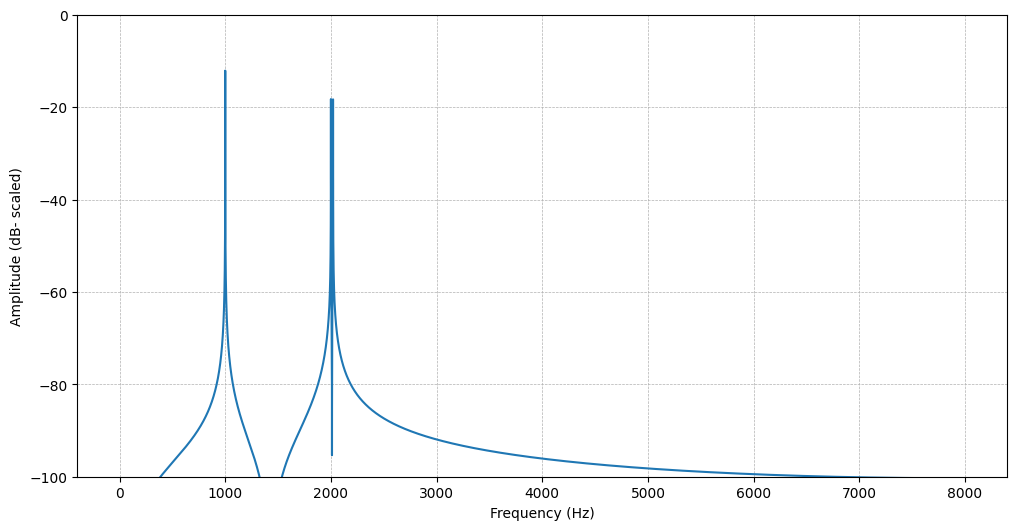

In [118]:
# normalize the magnitude values to reflect the actual amplitude of the signal.
z = np.abs(X)/len(data)
# z = z[:SAMPLE_RATE//2]
freqs = np.fft.fftfreq(len(data), 1 / SAMPLE_RATE)[:SAMPLE_RATE]

# fix dc offset
z[0] = 1e-10

z_db = 20*np.log10(z)

z_db = z_db[:SAMPLE_RATE]

plt.figure(figsize=(12, 6))
plt.plot(freqs, z_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB- scaled)")
plt.ylim(-100, 0)
# plt.xlim(0, len(freqs))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.savefig("section_2_fequency_plot.png")

$$
\phi = \arctan(\frac{complex}{real})
$$


In [124]:
# real part
a = X.real

# complex part
b = X.imag

In [127]:
phi = np.arctan2(b, a)
# phi = phi[:SAMPLE_RATE//2]
phi=phi[:SAMPLE_RATE]

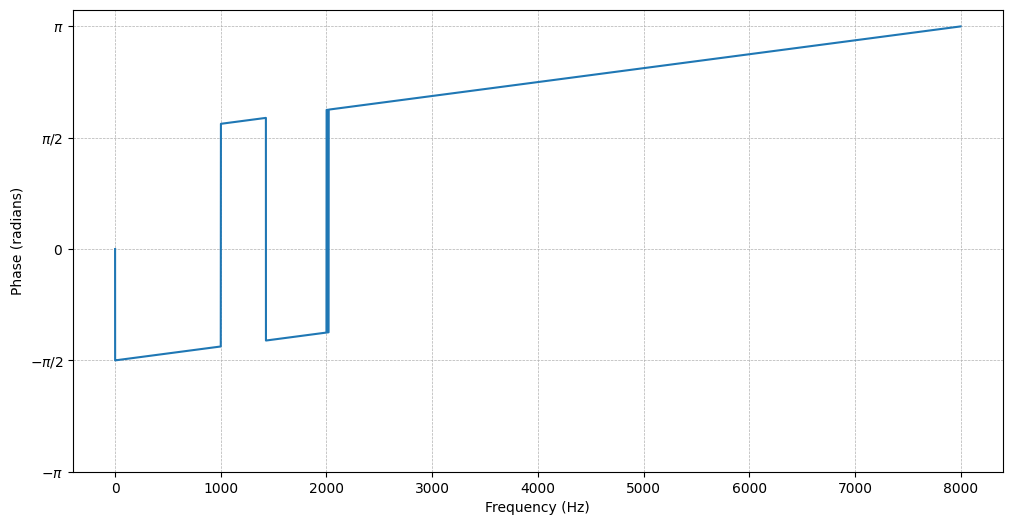

In [130]:
plt.figure(figsize=(12,6))
plt.plot(freqs,phi, label="Phase (radians)")

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Adjust y-axis to show ticks as multiples of π/2
plt.yticks(
    ticks=np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), 
    labels=[
        r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"
    ]  # Corresponding labels
)
# plt.xlim(0, len(freqs))
# Add labels and legend
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.savefig("section_2_phase_plot.png")

$$
x[n]=\frac{\sum*{t}x*{t}[n]w[n-tH]}{\sum\_{t}w^{2}[n-tH]}
$$


$$
x\_{t}[n]=x[n]w[n-tH]
$$
